In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [2]:
# Download stopwords if needed
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
# Load dataset
fake = pd.read_csv("Fake.csv")[['title', 'text']] 
fake['label'] = 'FAKE'

In [7]:
# Create some synthetic TRUE news
true_news = [
    {
        "title": "India Launches New Satellite to Boost Communication",
        "text": "The Indian Space Research Organisation (ISRO) successfully launched a new communication satellite to enhance network coverage across rural India."
    },
    {
        "title": "WHO Approves New Malaria Vaccine for Children",
        "text": "The World Health Organization has approved a groundbreaking malaria vaccine, expected to save millions of children's lives globally."
    },
    {
        "title": "Scientists Discover Microbial Life in Antarctic Ice",
        "text": "In a remarkable discovery, researchers found signs of microbial life in ancient Antarctic ice layers, pushing the boundaries of extremophile biology."
    },
    {
        "title": "Government Approves Education Reform Bill",
        "text": "The parliament passed a major education reform bill focused on digital classrooms, teacher training, and equitable access to resources."
    },
    {
        "title": "Apple Unveils New iPhone with Foldable Screen",
        "text": "Apple announced its new iPhone model featuring a foldable OLED display, improved battery life, and enhanced AI-powered camera."
    }
]

true_df = pd.DataFrame(true_news)
true_df['label'] = 'REAL'

In [8]:
# Combine both
df = pd.concat([fake, true_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
# Combine title + text into one feature
df['combined'] = df['title'] + ' ' + df['text']

In [10]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in tokens if word not in stop_words])

df['cleaned_text'] = df['combined'].apply(clean_text)

In [11]:
# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.7)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

In [12]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train model
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [14]:
y_pred = model.predict(X_test)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      4698

    accuracy                           1.00      4698
   macro avg       1.00      1.00      1.00      4698
weighted avg       1.00      1.00      1.00      4698



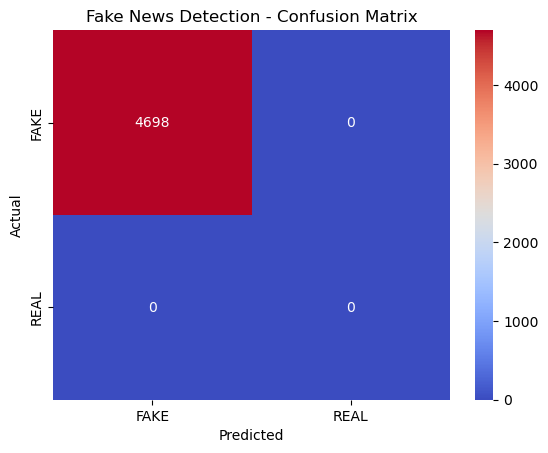

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.title("Fake News Detection - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# 11. Test on custom input
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)[0]
    print(f"\n Prediction: {prediction}")

In [17]:
# Example usage
predict_news("India successfully launches its new Gaganyaan crew module.")


 Prediction: FAKE
